In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,740 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [31]:
  import matplotlib.pyplot as plt

  plt.rc('font', family='NanumBarunGothic')

위에 코드들을 이용하여 나눔폰트를 코랩에 설치하고 matplotlib에 한글 나눔폰트가 나타나도록 합니다.

In [1]:
import pandas as pd

csv파일을 데이터프레임으로 저장하기 위해 pandas를 import합니다.

In [2]:
df = pd.read_csv('/content/sample_data/6_서울시 읍면동별 도시공원율.csv',encoding = 'cp949')

sample_data에 원하는 csv 파일을 업로드하고 데이터프레임으로 읽어옵니다.

In [3]:
df.head()

,행정구역ID,행정구역명,행정구역면적,공원수,공원율
0,1111051500,청운효자동,2.5665,2,70.44
1,1111053000,사직동,1.1577,6,24.26
2,1111054000,삼청동,1.4781,2,90.34
3,1111055000,부암동,2.2730,0,0.00
4,1111056000,평창동,8.9407,5,0.10


데이터프레임이 잘 읽혔는지 상위 5개의 데이터로 확인합니다.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역ID  424 non-null    int64  
 1   행정구역명   424 non-null    object 
 2   행정구역면적  424 non-null    float64
 3   공원수     424 non-null    int64  
 4   공원율     424 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 16.7+ KB


읽어들인 데이터프레임이 어떤 형태로 되어있는 지 확인합니다. 각 피쳐마다 424개의 데이터들이 있고 각각의 데이터 타입이 나와있습니다.

In [10]:
data = df[['행정구역명',"공원수"]]

행정구역에 따라 공원이 얼마나 있는 지 알아보고 싶기 때문에 두 피쳐만 가져와서 새로운 데이터프레임을 만듭니다.

In [13]:
data=data.T

행렬을 바꿔주었습니다.

In [14]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,414,415,416,417,418,419,420,421,422,423
행정구역명,청운효자동,사직동,삼청동,부암동,평창동,무악동,교남동,가회동,종로1.2.3.4가동,종로5.6가동,...,암사제3동,천호제1동,천호제2동,천호제3동,성내제1동,성내제2동,성내제3동,길동,둔촌제1동,둔촌제2동
공원수,2,6,2,0,5,2,1,1,6,2,...,4,5,7,2,3,1,3,5,0,3


모든 동의 공원수를 bar plot으로 나타내기에는 고윳값이 424개나 되기 때문에 공원수가 제일 많은 5개동을 찾아서 bar plot으로 그려보겠습니다.

In [24]:
data2 = data.T
data3 = data2.sort_values('공원수',ascending = False)

공원수가 가장 많은 동이 맨 위로 오도록 공원수로 데이터들을 정렬해줍니다.

In [26]:
data4=data3.head()

그 중 상위 5개를 선택하고 새로운 데이터프레임으로 만들어줍니다.

In [27]:
data4

,행정구역명,공원수
354,양재1동,26
374,세곡동,22
355,양재2동,19
221,상암동,18
191,진관동,16


데이터가 잘 형성되었는 지 확인해줍니다. 확인 결과 양재1동이 가장 공원수가 많고 그 다음이 세곡동입니다.

In [177]:
data4.row = [1,2,3,4,5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


인덱스가 원래 데이터프레임의 인덱스이기 때문에 보기 편하게 변경해주었습니다.

In [178]:
data4

,행정구역명,공원수
1,양재1동,26
2,세곡동,22
3,양재2동,19
4,상암동,18
5,진관동,16


In [39]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 행정구역명 to 공원수
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   354     2 non-null      object
 1   374     2 non-null      object
 2   355     2 non-null      object
 3   221     2 non-null      object
 4   191     2 non-null      object
dtypes: object(5)
memory usage: 204.0+ bytes


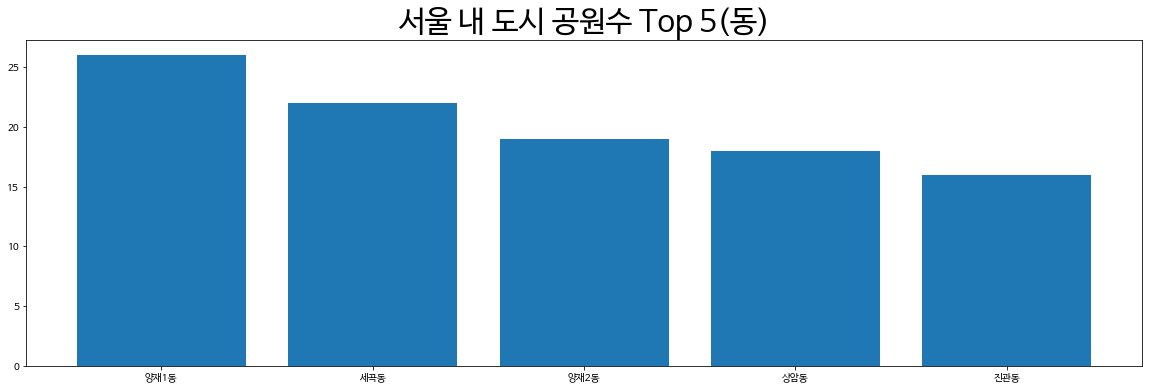

In [51]:
fig = plt.figure(figsize = (20,6))
ax = fig.add_subplot(111)
ax.bar(data4['행정구역명'],data4['공원수'])
plt.title('서울 내 도시 공원수 Top 5(동)',fontsize = 30)
plt.show()

bar 함수를 이용해서 그래프를 그려주었습니다.

In [133]:
data_per=df.sort_values('공원율',ascending = False)

이번에는 한번 공원율로 위와 같이 5개동을 선택했습니다.

In [134]:
data_per.head()

,행정구역ID,행정구역명,행정구역면적,공원수,공원율
95,1126054000,면목제4동,0.8428,3,606.41
166,1135062400,중계4동,1.5183,6,352.28
99,1126057500,면목제3.8동,1.6129,5,213.04
272,1153077000,오류제1동,0.7273,2,151.95
136,1130560300,번2동,0.9736,3,139.62


In [135]:
data5 = data_per[['행정구역명','공원율']]
data6 = data5.head()

In [136]:
data6 = data6.T
data6.columns = [1,2,3,4,5]
data6 = data6.T

In [137]:
data6

,행정구역명,공원율
1,면목제4동,606.41
2,중계4동,352.28
3,면목제3.8동,213.04
4,오류제1동,151.95
5,번2동,139.62


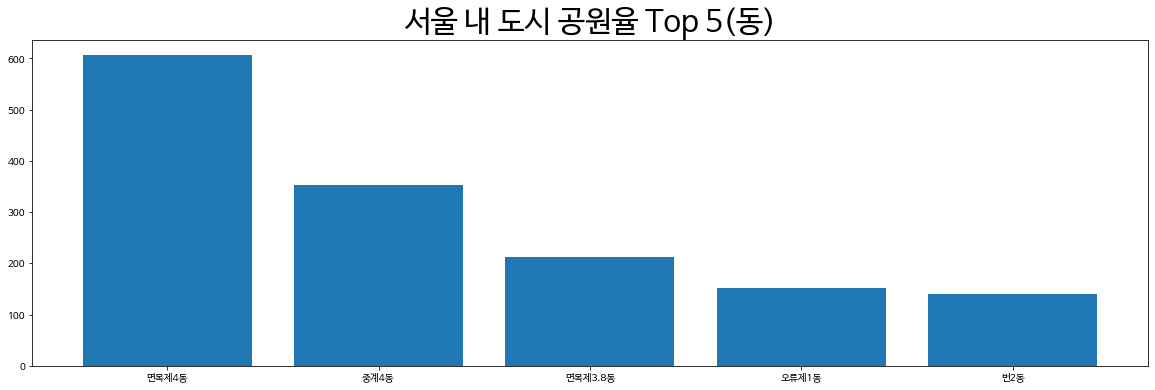

In [138]:
fig = plt.figure(figsize = (20,6))
ax = fig.add_subplot(111)
ax.bar(data6['행정구역명'],data6['공원율'])
plt.title('서울 내 도시 공원율 Top 5(동)',fontsize = 30)
plt.show()

이제 공원율 top 5개 동이 어디에 위치하는 지 지도로 표시해보겠습니다.

In [139]:
import folium

지도 표시를 위해 folium 함수를 import 해주었습니다.

In [140]:
# 카카오API를 사용하여 주소->좌표 변환
import requests, json

def get_location(address):
  url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + address
  # 'KaKaoAK '는 그대로 두시고 개인키만 지우고 입력해 주세요.
  # ex) KakaoAK 6af8d4826f0e56c54bc794fa8a294
#  headers = {"Authorization": "KakaoAK 개인키"}
  headers = {"Authorization": "KakaoAK aec61e1d1ba5fe57f9f537d020297cf0"}
  api_json = json.loads(str(requests.get(url,headers=headers).text))
  address = api_json['documents'][0]['address']
  crd = {"lat": str(address['y']), "lng": str(address['x'])}
  address_name = address['address_name']

  return crd

강사님께서 올려주신 kakao api를 이용해서 위 5개 동의 위도와 경도를 구합니다.

In [155]:
data6['행정구역명'].iloc[2] = '면목3.8동'

여기서 문제가 생겼는데 get_location 함수로 원래 행정구역명이었던 면목제3.8동을 찾으면 그 주소가 list에 없어서 list out of range 에러가 발생했었습니다. 그래서 제를 빼고 get_location 함수를 돌렸을 때 정상적으로 출력되어서 3번째 데이터의 행정구역명만 위와 같이 변경해주었습니다.

In [157]:
crd = []
for i in range(5):
  crd.append(get_location(data6['행정구역명'].iloc[i]))


빈 리스트를 만들고 위 5개동의 위도와 경도를 저장했습니다.

In [162]:
crd

[{'lat': '37.5746895999008', 'lng': '127.085626342164'},
 {'lat': '37.6587606815605', 'lng': '127.077989166736'},
 {'lat': '37.5803715762431', 'lng': '127.087661590766'},
 {'lat': '37.4970933382635', 'lng': '126.845050656227'},
 {'lat': '37.6276612500457', 'lng': '127.035090468244'}]

In [166]:
data6['위도']=0

In [168]:
for i in range(5):
  data6['위도'].iloc[i] = crd[i]["lat"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


데이터프레임에 위도 피쳐를 만들어 일단 0 값을 넣어주고 후에 위도 값으로 바꿔주었습니다.

In [171]:
data6['위도']

1    37.5746895999008
2    37.6587606815605
3    37.5803715762431
4    37.4970933382635
5    37.6276612500457
Name: 위도, dtype: object

In [172]:
data6['경도'] = 0

In [173]:
for i in range(5):
  data6['경도'].iloc[i] = crd[i]["lng"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


위와 마찬가지로 데이터프레임에 경도 피쳐를 만들어 일단 0 값을 넣어주고 후에 경도 값으로 바꿔주었습니다.

In [174]:
data6

,행정구역명,공원율,위도,경도
1,면목제4동,606.41,37.5746895999008,127.085626342164
2,중계4동,352.28,37.6587606815605,127.077989166736
3,면목3.8동,213.04,37.5803715762431,127.087661590766
4,오류제1동,151.95,37.4970933382635,126.845050656227
5,번2동,139.62,37.6276612500457,127.035090468244


이제 데이터 프레임을 확인하면 위도값과 경도값이 제대로 들어가있습니다.

In [176]:
# 서울 지도 만들기
map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

# 대학교 위치정보를 Marker로 표시
for name, lat, lng in zip(data6.행정구역명, data6.위도, data6.경도):
    folium.Marker([lat, lng], popup=name).add_to(map)

# 지도를 HTML 파일로 저장하기
map.save('./top5.html')

folium에 있던 서울 대학 위치를 지도에 표시해주는 예제에서 값만 바꿔서 위치를 표시했습니다.